# 1. Python - kurs wprowadzający

Organizatorzy:

    prof. dr hab. inż. Witold Rohm
    mgr inż. Krzysztof Stasch

Warsztaty prowadzone będą przez:
    
    dr inż. Kamil Smolak
    dr inż. Radosław Zajdel
    dr inż. Przemysław Tymków
    mgr inż. Adam Nadolny
    
Dzisiejszy kurs prowadzony jest przez: 

    dr inż. Kamil Smolak

Data: 09.03.2024

Miejsce: Uniwersytet Przyrodniczy we Wrocławiu, Wrocław

Kurs składa się z:

    Wprowadzenia teoretycznego
    Omówienia jak pracować z Pythonem samemu w domu
    Środowiska programistyczne
    Typy danych i zmienne
    Kontrola przepływu w kodzie

## Co to jest Python i o co w nim chodzi?

Python to prosty i potężny język programowania. Jest prosty w nauce i pozwala skupić się na problemie, nie problemie programowania. To język wysokiego poziomu.


<img src="python-logo-master-v3-TM.png"/>

## Język wysokiego poziomu?

Im język jest wyższego poziomu <b> tym bardziej zbliżony jest do języka naturalnego </b>. 

W praktyce oznacza to, że wiele operacji jest wykonywanych już za nas:
<ul>
    <li>Zarządzanie pamięcią</li>
    <li>Mapowanie typów zmiennych</li>
    <li>Alokacja pamięci</li>
</ul>

Dzięki czemu możemy zająć się problemem, który mamy rozwiązać, nie problemem programowania.

<img src="python-and-zope-an-introduction-may-2004-3-638.jpg"/>

## Wady i zalety Pythona

### Wady

Największą i najczęściej wymienianą wadą Pythona jest jego szybkość i wykorzystanie pamięci. <b> Python jest wolny i wymaga sporych zasobów </b>

<img src="most-efficient.jpg"/>

### Zalety

Największą zaletą Pythona jest jego <b> popularność </b>. Ta zaleta pozwala na pokonanie wszystkich jego wad - również tych związanych z jego powolnością. 

Python ma niepodważalne zalety w postaci oszczędności kodu, łatwości zrozumienia, automatycznego zarządzania pamięcią, przenoszalności i czytelności. Dlatego też został wybrany przez ogromną liczbę programistów i deweloperów blibliotek.

Dlatego jest też tak pożądany na rynku pracy.

## Możliwości Pythona

Python używany jest w ogromnej liczbie zastosowań i ma bardzo dużo możliwości - głównie dzięki społeczności, która jego możliwości rozszerza. Przykłady wykorzystania Pythona:

    Budowa stron internetowych
    Analiza danych (Data Science)
    Zastosowanie i rozwój algrytmów sztucznej inteligencji
    Zarządzanie danymi (bazy danych)
    Tworzenie gier komputerowych
    Edukacja
    
    Finanse (na przykład przewidywanie cen akcji na giełdzie)
    Budowa modeli językowych (jak ChatGPT)
    Analityka sportowa (przewidywanie wyników meczów, kontuzji zawodników)
    Tworzenie animacji
    
i wiele, wiele więcej.
    

## Kilka przykładów

### Rozpoznawanie odręcznego pisma

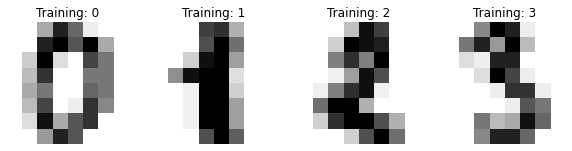

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [2]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

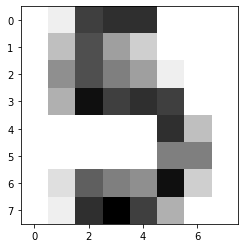

In [3]:
obraz_num = 22
image = X_test[obraz_num]
image = image.reshape(8,8)
plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')

In [4]:
print(predicted[obraz_num])

5


### Wizualizacja funkcji

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_function(func_text, x_range=(-10, 10), num_points=400):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], num_points)

    # Evaluate the function
    y = eval(func_text)

    # Plot the function
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'y = {func_text}', color='blue')
    plt.title(f'Wykres funkcji y = {func_text}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

In [6]:
function_text = input("Podaj wzór funkcji do wizualizacji: ")
visualize_function(function_text)

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

### Gra - zgadnij film

In [1]:
import random
import requests
from io import BytesIO
from IPython.display import display
from PIL import Image
import imdb

ia = imdb.Cinemagoer()
movies = ['Matrix','Godfather','Heat','Shawshank','Fight Club','Inception','Interstellar']
movies_id = []
for name in movies:
    movies_id.append(ia.search_movie(name)[0].movieID)

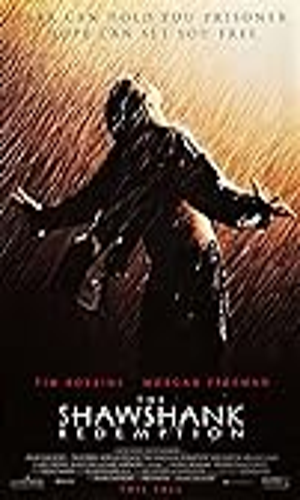

Zgadnij tytuł: Shawshank
Wybacz, poprawna nazwa filmu to: The Shawshank Redemption.
Gramy jeszcze raz? (tak/nie): nie


In [2]:
def get_random_movie_poster():
    ia = imdb.Cinemagoer()
    mov_id = random.choice(movies_id)
    movies_id.remove(mov_id)
    random_movie = ia.get_movie(mov_id)
    poster_url = random_movie.data['cover url']
    movie_title = random_movie['title']
    poster_url = random_movie.data['cover url']
    response = requests.get(poster_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((300,500))
    display(img)
    return movie_title

def guess_movie():
    correct_movie = get_random_movie_poster()
    if correct_movie:
        guess = input("Zgadnij tytuł: ").strip().lower()
        if guess == correct_movie.lower():
            print("Gratuluję!")
        else:
            print(f"Wybacz, poprawna nazwa filmu to: {correct_movie}.")

# Main game loop
while True:
    guess_movie()
    play_again = input("Gramy jeszcze raz? (tak/nie): ").strip().lower()
    if play_again != "tak":
        break

### A nawet prezentacje

In [3]:
import manim
from manim import *
config.media_width = "100%"
config.verbosity = "WARNING"

Manim Community v0.16.0.post0

In [4]:
%%manim -qh BooleanOperations

class BooleanOperations(Scene):
    def construct(self):
        ellipse1 = Ellipse(
            width=4.0, height=5.0, fill_opacity=0.5, color=BLUE, stroke_width=10
        ).move_to(LEFT)
        ellipse2 = ellipse1.copy().set_color(color=RED).move_to(RIGHT)
        bool_ops_text = MarkupText("<u>Operacje logiczne</u>").next_to(ellipse1, UP * 3)
        ellipse_group = Group(bool_ops_text, ellipse1, ellipse2).move_to(LEFT * 3)
        self.play(FadeIn(ellipse_group))

        i = Intersection(ellipse1, ellipse2, color=GREEN, fill_opacity=0.5)
        self.play(i.animate.scale(0.25).move_to(RIGHT * 5 + UP * 2.5))
        intersection_text = Text("Przecięcie", font_size=23).next_to(i, UP)
        self.play(FadeIn(intersection_text))

        u = Union(ellipse1, ellipse2, color=ORANGE, fill_opacity=0.5)
        union_text = Text("Suma", font_size=23)
        self.play(u.animate.scale(0.3).next_to(i, DOWN, buff=union_text.height * 3))
        union_text.next_to(u, UP)
        self.play(FadeIn(union_text))

        e = Exclusion(ellipse1, ellipse2, color=YELLOW, fill_opacity=0.5)
        exclusion_text = Text("Różnica symetryczna", font_size=23)
        self.play(e.animate.scale(0.3).next_to(u, DOWN, buff=exclusion_text.height * 3.5))
        exclusion_text.next_to(e, UP)
        self.play(FadeIn(exclusion_text))

        d = Difference(ellipse1, ellipse2, color=PINK, fill_opacity=0.5)
        difference_text = Text("Różnica", font_size=23)
        self.play(d.animate.scale(0.3).next_to(u, LEFT, buff=difference_text.height * 3.5))
        difference_text.next_to(d, UP)
        self.play(FadeIn(difference_text))
        
        self.wait(10)

### To tylko niewielka część możliwości, wiele używanych przez nas narzędzi jest napisane w Pythonie

    Amazon
    Facebook
    Spotify
    Netfilx
    ChatGPT
    ...

<h2> Do każdego modułu dostępne są listy ćwiczeń, które możecie wykonać we własnym zakresie w domu </h2>

Ta prezentacja i reszta jest dostępna online pod linkiem: https://smolakk.github.io/KursKGHM/ 
lub poniższym QR kodem:

<img src='frame.png'/>


Niezbędna będzie instalacja Pythona i środowiska programistycznego (tego, w którym jest ta prezentacja).

Instrukcje jak korzystać z Pythona lub zainstalować samemu Pythona na swoim komputerze dostępne są w module "Instalacja Pythona"

## Jak dalej rozwijać swoje umiejętności w programowaniu w Pythonie?

    Wykonywanie przekazanych przez nas zadań oraz materiałów
    Wykonanie interaktywnych kursów online, np. codeacademy
    Trening poprzez rywalizację w rozwiązywaniu problemów programistycznych: leetcode.com lub hackerrank.com